In [30]:
import pandas
import numpy

import matplotlib.pyplot as plt
from scipy.stats import median_test, mannwhitneyu

Load growth data sets from PLATES 

In [3]:
PLATES = pandas.read_pickle('tb_rnap_compensation/tables/UKMYC_PLATES.pkl.gz')
PLATES.reset_index(inplace=True)
PLATES

,UNIQUEID,SITEID,SUBJID,LABID,ISOLATENO,READINGDAY,BELONGS_GPI,PLATEDESIGN,TREE_PATH,IMAGEFILENAME,IMAGE_MD5SUM,DUPLICATED_IMAGE,IM_IMAGE_DOWNLOADED,IM_IMAGE_FILTERED,IM_WELLS_IDENTIFIED,IM_POS1GROWTH,IM_POS2GROWTH,IM_POS_AVERAGE,IM_DRUGS_INCONSISTENT_GROWTH,TRUST_PHENOTYPES
0,site.11.subj.MDR044.lab.SWE-33.iso.1,11,MDR044,SWE-33,1,10,False,UKMYC5,dat/CRyPTIC2/V2/11/MDR044/SWE-33/1/10/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True
1,site.11.subj.MDR045.lab.SWE-34.iso.1,11,MDR045,SWE-34,1,10,True,UKMYC5,dat/CRyPTIC2/V2/11/MDR045/SWE-34/1/10/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True
2,site.11.subj.MDR046.lab.SWE-35.iso.1,11,MDR046,SWE-35,1,10,True,UKMYC5,dat/CRyPTIC2/V2/11/MDR046/SWE-35/1/10/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True
3,site.11.subj.MDR047.lab.SWE-36.iso.1,11,MDR047,SWE-36,1,10,True,UKMYC5,dat/CRyPTIC2/V2/11/MDR047/SWE-36/1/10/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True
4,site.11.subj.MDR048.lab.SWE-37.iso.1,11,MDR048,SWE-37,1,10,True,UKMYC5,dat/CRyPTIC2/V2/11/MDR048/SWE-37/1/10/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20632,site.17.subj.P3038.lab.086-15-3038-B.iso.1,17,P3038,086-15-3038-B,1,21,True,UKMYC6,dat/CRyPTIC2/V2/17/P3038/086-15-3038-B/1/21/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True
20633,site.17.subj.P3424.lab.086-15-3424-B.iso.1,17,P3424,086-15-3424-B,1,21,True,UKMYC6,dat/CRyPTIC2/V2/17/P3424/086-15-3424-B/1/21/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True
20634,site.17.subj.P3524.lab.086-15-3524-B.iso.1,17,P3524,086-15-3524-B,1,21,True,UKMYC6,dat/CRyPTIC2/V2/17/P3524/086-15-3524-B/1/21/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True
20635,site.17.subj.P3524.lab.086-15-3524-M2.iso.1,17,P3524,086-15-3524-M2,1,21,True,UKMYC6,dat/CRyPTIC2/V2/17/P3524/086-15-3524-M2/1/21/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True


Extract unique sample IDs from samples with significantly correlating mutations (resistance mutation and corresponding other mutation)

In [4]:
MUTATIONS = pandas.read_pickle('tb_rnap_compensation/tables/MUTATIONS.pkl.gz')
MUTATIONS.reset_index(inplace=True)
#MUTATIONS.set_index('UNIQUEID', inplace=True)
MUTATIONS = MUTATIONS.astype({'GENE':'str'})
MUTATIONS['GENE_MUTATION'] = MUTATIONS['GENE'] + '_' + MUTATIONS['MUTATION']
MUTATIONS

,UNIQUEID,GENE,MUTATION,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,...,IS_NULL,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID,NUMBER_NUCLEOTIDE_CHANGES,GENE_MUTATION
0,site.02.subj.0958.lab.22A197.iso.1,rpoB,P45S,45.0,45.0,NaN,NaN,ccg,tcg,True,...,False,True,GENE,AAM,NaN,,,02,1,rpoB_P45S
1,site.02.subj.0958.lab.22A197.iso.1,rpoB,S450L,450.0,450.0,NaN,NaN,tcg,ttg,True,...,False,True,GENE,AAM,NaN,,,02,1,rpoB_S450L
2,site.02.subj.0958.lab.22A197.iso.1,rpoB,A1075A,1075.0,1075.0,NaN,NaN,gct,gcc,True,...,False,True,GENE,AAM,NaN,,,02,1,rpoB_A1075A
3,site.02.subj.0958.lab.22A197.iso.1,rpoC,D271E,271.0,271.0,NaN,NaN,gac,gag,True,...,False,True,GENE,AAM,NaN,,,02,1,rpoC_D271E
4,site.02.subj.0823.lab.2013241494.iso.1,rpoB,A1075O,1075.0,1075.0,NaN,NaN,gct,gco,True,...,False,False,GENE,AAM,NaN,,,02,1,rpoB_A1075O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517506,site.10.subj.YA00023171.lab.YA00023171.iso.1,rpoC,A542A,542.0,542.0,NaN,NaN,gcc,gcg,True,...,False,True,GENE,AAM,NaN,,,10,1,rpoC_A542A
517507,site.10.subj.SADH00634109_S16.lab.DH00634109_S...,rpoC,A542A,542.0,542.0,NaN,NaN,gcc,gcg,True,...,False,True,GENE,AAM,NaN,,,10,1,rpoC_A542A
517508,site.10.subj.YA00044774.lab.YA00044774.iso.1,rpoC,A542A,542.0,542.0,NaN,NaN,gcc,gcg,True,...,False,True,GENE,AAM,NaN,,,10,1,rpoC_A542A
517509,site.10.subj.YA00166043.lab.YA00166043.iso.1,rpoB,D435V,435.0,435.0,NaN,NaN,gac,gtc,True,...,False,True,GENE,AAM,NaN,,,10,1,rpoB_D435V


In [5]:
hits = pandas.read_excel('hits.xlsx')
hits.resistant_mutation.unique()

array(['rpoB_S450L', 'rpoB_L430P', 'rpoB_V170F', 'rpoB_S450W',
       'rpoB_D435Y', 'rpoB_D435G', 'rpoB_L452P', 'rpoB_D435V',
       'rpoB_H445D', 'rpoB_S441L', 'rpoB_I491F', 'rpoB_Q432P'],
      dtype=object)

Plot growth of all samples with CMs against growth of all samples with only resistance mutations

Create dataframe of all samples that have significant correlations

In [6]:
concat_samples = []

for i,name in enumerate(hits.resistant_mutation.unique()):
    resistance = MUTATIONS[(MUTATIONS.GENE_MUTATION==hits.resistant_mutation.unique()[i])].UNIQUEID
    hit_samples_local=MUTATIONS[(MUTATIONS.GENE_MUTATION.isin(hits.other_mutation.values.tolist()))&(MUTATIONS.UNIQUEID.isin(resistance.tolist()))].UNIQUEID.unique()
    
    concat_samples.append(hit_samples_local)


concat_samples = numpy.concatenate(concat_samples)
concat_samples=pandas.DataFrame(concat_samples,columns=['UNIQUEID'])

concat_samples

,UNIQUEID
0,site.02.subj.0958.lab.22A197.iso.1
1,site.02.subj.0739.lab.2013221518.iso.1
2,site.02.subj.0885.lab.22A119.iso.1
3,site.02.subj.0411.lab.235087-14.iso.1
4,site.02.subj.0086.lab.22A038.iso.1
...,...
10599,site.03.subj.18005350_LIB18929.lab.18005350_LI...
10600,site.03.subj.3518-98_LIB10266.lab.3518-98_LIB1...
10601,site.06.subj.ICK-1008.lab.06MIL1062.iso.1
10602,site.06.subj.06TB_0289.lab.06MIL0880.iso.1


In [7]:
data1 = PLATES[(PLATES.UNIQUEID.isin(concat_samples.UNIQUEID.values.tolist()))].IM_POS_AVERAGE

Create dataframe of growth in all samples that contain resistance mutations but no CMs

In [56]:
EFFECTS = pandas.read_pickle('tb_rnap_compensation/tables/EFFECTS.pkl.gz')
EFFECTS.reset_index(inplace=True)
EFFECTS['GENE_MUTATION'] = EFFECTS['GENE'] + '_' + EFFECTS['MUTATION']
EFFECTS = EFFECTS[(EFFECTS.DRUG=='RIF') & (EFFECTS.PREDICTION=='R') & (~EFFECTS.MUTATION.str[-1].isin(['O','X']))]
EFFECTS

data2 = PLATES[(PLATES.UNIQUEID.isin(EFFECTS.UNIQUEID.values.tolist()))&(~(PLATES.UNIQUEID.isin(concat_samples.UNIQUEID.values.tolist())))].IM_POS_AVERAGE

,UNIQUEID,DRUG,GENE,MUTATION,CATALOGUE_NAME,CATALOGUE_VERSION,CATALOGUE_GRAMMAR,SITEID,PREDICTION,DEFAULT_CATALOGUE,GENE_MUTATION
3,site.02.subj.0958.lab.22A197.iso.1,RIF,rpoB,S450L,CRyPTIC,v1.31,GARC1,02,R,True,rpoB_S450L
16,site.02.subj.0918.lab.22A153.iso.1,RIF,rpoB,D435G,CRyPTIC,v1.31,GARC1,02,R,True,rpoB_D435G
45,site.02.subj.1033.lab.2013185075.iso.1,RIF,rpoB,S450L,CRyPTIC,v1.31,GARC1,02,R,True,rpoB_S450L
51,site.02.subj.0739.lab.2013221518.iso.1,RIF,rpoB,S450L,CRyPTIC,v1.31,GARC1,02,R,True,rpoB_S450L
89,site.02.subj.0104.lab.22A057.iso.1,RIF,rpoB,S450L,CRyPTIC,v1.31,GARC1,02,R,True,rpoB_S450L
...,...,...,...,...,...,...,...,...,...,...,...
1074634,site.10.subj.SATRL0115669_S18.lab.TRL0115669_S...,RIF,rpoB,S450L,CRyPTIC,v1.31,GARC1,10,R,True,rpoB_S450L
1074647,site.10.subj.XD01227882.lab.XD01227882.iso.1,RIF,rpoB,S450L,CRyPTIC,v1.31,GARC1,10,R,True,rpoB_S450L
1074653,site.10.subj.WG00269790.lab.WG00269790.iso.1,RIF,rpoB,S450L,CRyPTIC,v1.31,GARC1,10,R,True,rpoB_S450L
1074661,site.10.subj.YA00008913.lab.YA00008913.iso.1,RIF,rpoB,S450L,CRyPTIC,v1.31,GARC1,10,R,True,rpoB_S450L


Plot both growth distributions in one plot

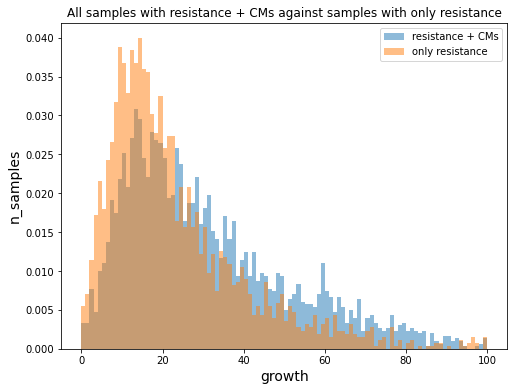

In [9]:
plt.figure(figsize=(8,6))
plt.hist(data1, bins=100, alpha=0.5, label="resistance + CMs", density=True)
plt.hist(data2, bins=100, alpha=0.5, label="only resistance", density=True)
plt.xlabel("growth", size=14)
plt.ylabel("n_samples", size=14)
plt.title("All samples with resistance + CMs against samples with only resistance")
plt.legend(loc='upper right')

Plot growth of one specific combination of resistance mutation and CM against a (uniformly sampled) fraction of growth in samples with only resistance mutations

Create Dataframe with UNIQUEID as well as combination of resistant_mutation and other_mutation as identifiers

In [10]:
hit_samples = []
name=[]

for i, mut in enumerate(hits.resistant_mutation.unique()):
    
    resistance = MUTATIONS[(MUTATIONS.GENE_MUTATION==hits.resistant_mutation.unique()[i])].UNIQUEID
    hit_samples_local= MUTATIONS[(MUTATIONS.GENE_MUTATION.isin(hits.other_mutation.values.tolist())) & (MUTATIONS.UNIQUEID.isin(resistance.tolist()))]
    #construct name to be used as index for plotting (resistant_mutation+other_mutation)
    name_local = mut + '_' + hit_samples_local.GENE_MUTATION
    
    name.append(name_local)
    hit_samples.append(hit_samples_local.UNIQUEID)

hit_samples = numpy.concatenate(hit_samples)
name = numpy.concatenate(name)
hit_samples = pandas.DataFrame(hit_samples,name,columns=['UNIQUEID'])

print(len(hit_samples))

#filter out all combinations with prevalence of <100
hit_samples = hit_samples.reset_index()
hit_samples.rename(columns = {'index':'mutations'}, inplace=True) 

prevalence=hit_samples.mutations.value_counts()>100
combinations = prevalence[prevalence].index.tolist()
print(combinations)

hit_samples = hit_samples.set_index('mutations')
hit_samples

12887
['rpoB_S450L_rpoC_E1092D', 'rpoB_S450L_rpoC_V483G', 'rpoB_S450L_rpoB_c-61t', 'rpoB_S450L_rpoC_I491V', 'rpoB_S450L_rpoC_V483A', 'rpoB_S450L_rpoC_I491T', 'rpoB_S450L_rpoC_P1040R', 'rpoB_S450L_rpoC_F452S', 'rpoB_S450L_rpoB_E761D', 'rpoB_S450L_rpoB_L731P', 'rpoB_S450L_rpoC_N698S', 'rpoB_S450L_rpoC_D485Y', 'rpoB_S450L_rpoC_V517L', 'rpoB_S450L_rpoC_G332S', 'rpoB_S450L_rpoC_V1252L', 'rpoB_S450L_rpoA_T187A', 'rpoB_S450L_rpoC_D485N', 'rpoB_D435Y_rpoB_c-61t', 'rpoB_S450L_rpoC_L516P', 'rpoB_S450L_rpoC_G433S', 'rpoB_S450L_rpoB_R827C', 'rpoB_S450L_rpoC_P1040S', 'rpoB_S450L_rpoC_G332R', 'rpoB_S450L_rpoC_L527V', 'rpoB_S450L_rpoC_P1040A', 'rpoB_D435V_rpoB_c-61t', 'rpoB_D435G_rpoB_I1106T', 'rpoB_L452P_rpoB_I1106T']


,UNIQUEID
mutations,
rpoB_S450L_rpoB_P45S,site.02.subj.0958.lab.22A197.iso.1
rpoB_S450L_rpoC_V483A,site.02.subj.0739.lab.2013221518.iso.1
rpoB_S450L_rpoC_V483A,site.02.subj.0885.lab.22A119.iso.1
rpoB_S450L_rpoA_T187A,site.02.subj.0411.lab.235087-14.iso.1
rpoB_S450L_rpoC_N698S,site.02.subj.0086.lab.22A038.iso.1
...,...
rpoB_Q432P_rpoC_V483A,site.03.subj.3518-98_LIB10266.lab.3518-98_LIB1...
rpoB_Q432P_rpoC_E1092D,site.03.subj.3518-98_LIB10266.lab.3518-98_LIB1...
rpoB_Q432P_rpoB_c-61t,site.06.subj.ICK-1008.lab.06MIL1062.iso.1


Plot growth distribution of specific combination (here: rpoB_S450L_rpoC_V483A) against growth distribution with only resistance mutations

In [58]:
to_plot = hit_samples.loc['rpoB_S450L_rpoC_V483A']
data1 = PLATES[(PLATES.UNIQUEID.isin(to_plot.UNIQUEID.values.tolist()))].IM_POS_AVERAGE
data2 = PLATES[(PLATES.UNIQUEID.isin(EFFECTS.UNIQUEID.values.tolist()))&(~(PLATES.UNIQUEID.isin(concat_samples.UNIQUEID.values.tolist())))].IM_POS_AVERAGE

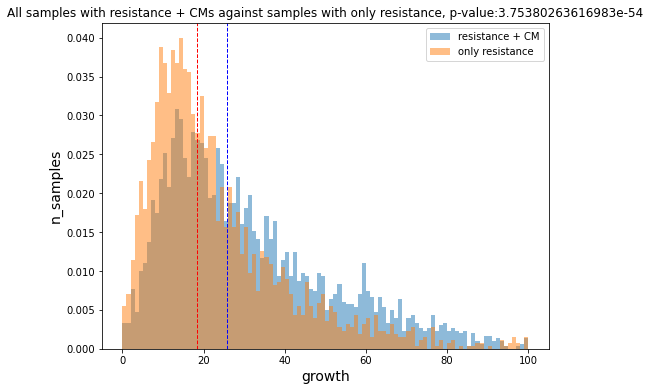

In [68]:
#plot growth distribution against distribution of all samples with only resistance mutation
plt.figure(figsize=(8,6))

data1.dropna(inplace=True)
data2.dropna(inplace=True)
stat, p, = mannwhitneyu(data2, data1)

plt.hist(data1, bins=100, alpha=0.5, label="resistance + CM", density=True)
plt.axvline(data1.median(), color='blue', linestyle='dashed', linewidth=1)
plt.hist(data2, bins=100, alpha=0.5, label="only resistance", density=True)
plt.axvline(data2.median(), color='red', linestyle='dashed', linewidth=1)
plt.xlabel("growth", size=14)
plt.ylabel("n_samples", size=14)
plt.title("All samples with resistance + CMs against samples with only resistance, p-value:" + str(p))
plt.legend(loc='upper right')

Plot growth of all significant combinations above prevalence threshold against (uniformly sampled) growth of samples with only resistance mutations

/var/folders/qq/hh4z_qvd2l183wg_57cf1pyc0000gn/T/ipykernel_29365/3383336381.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


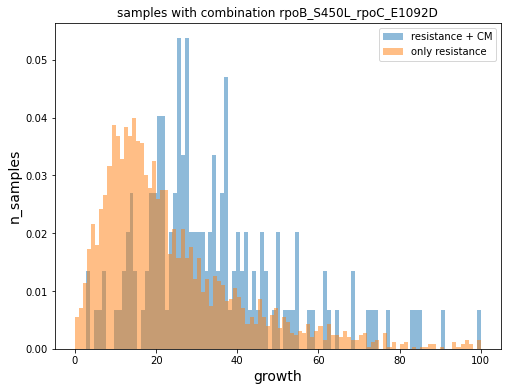

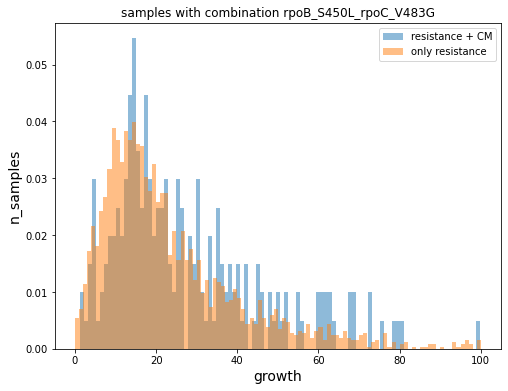

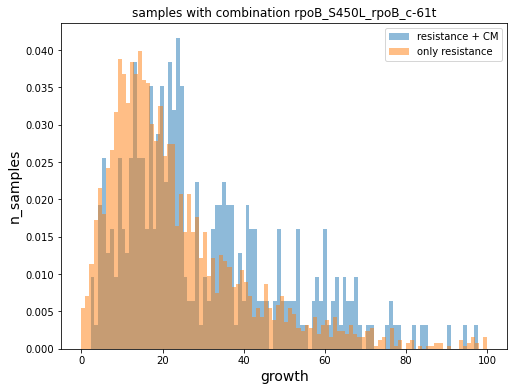

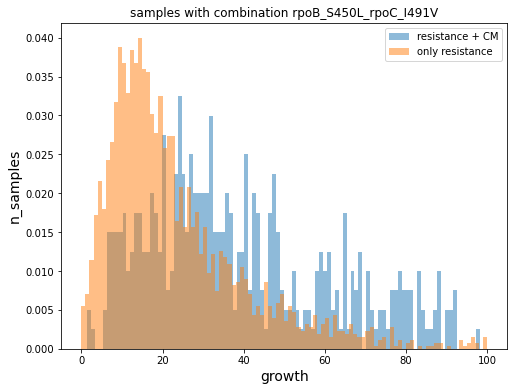

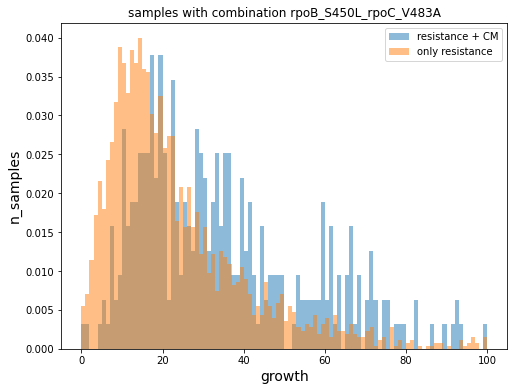

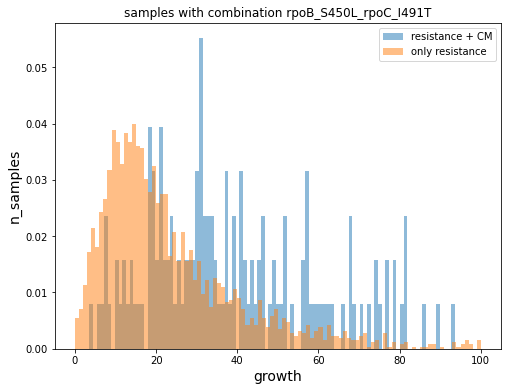

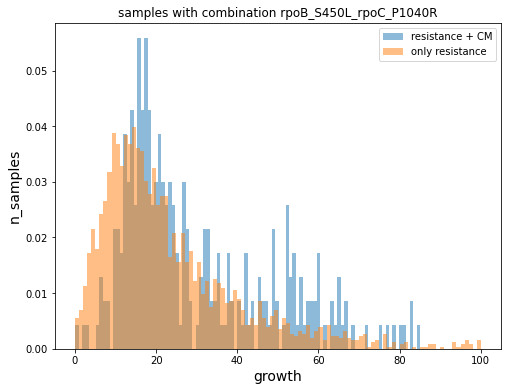

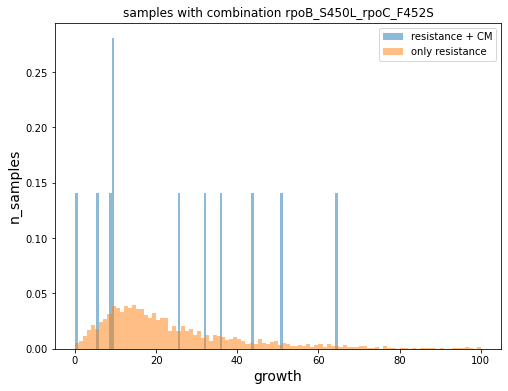

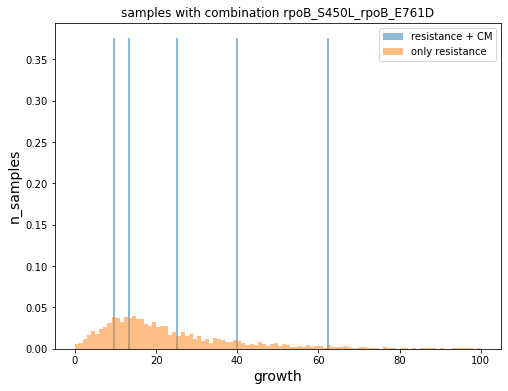

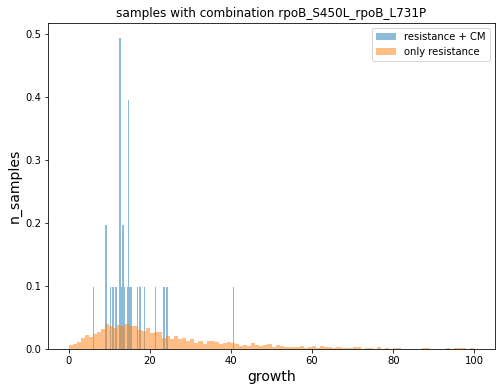

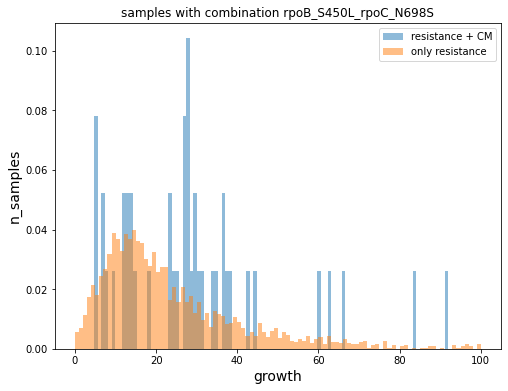

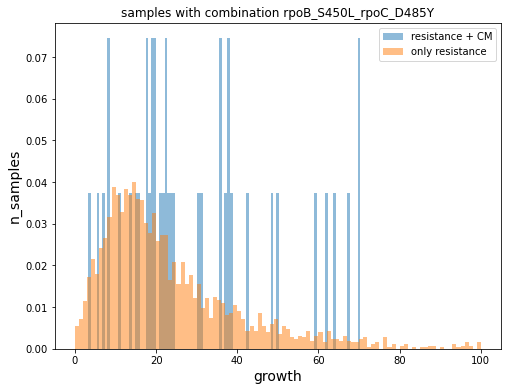

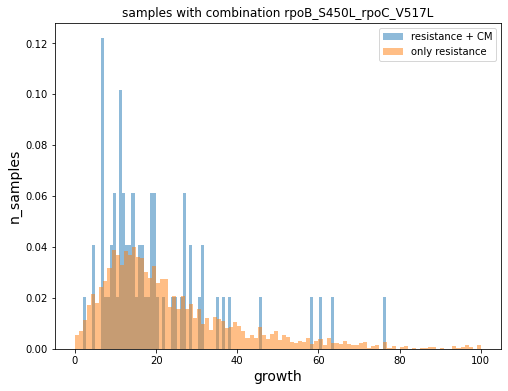

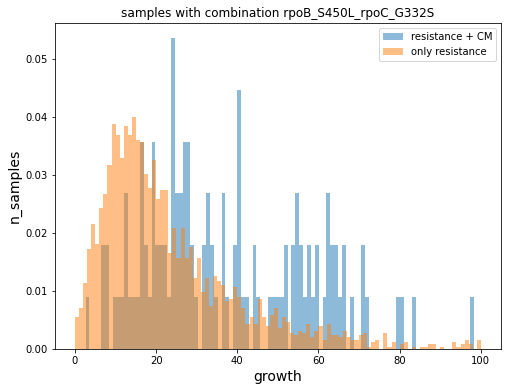

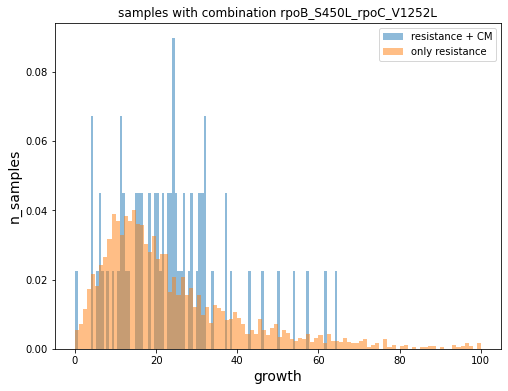

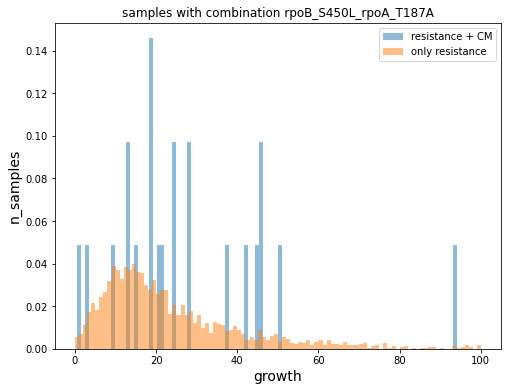

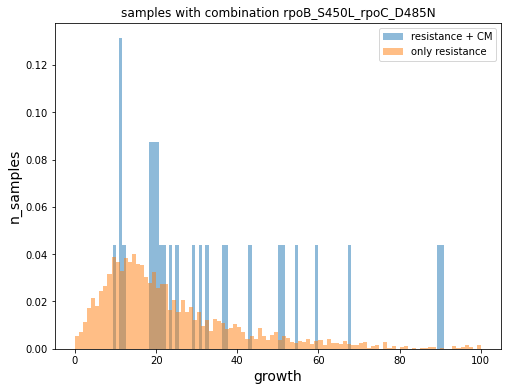

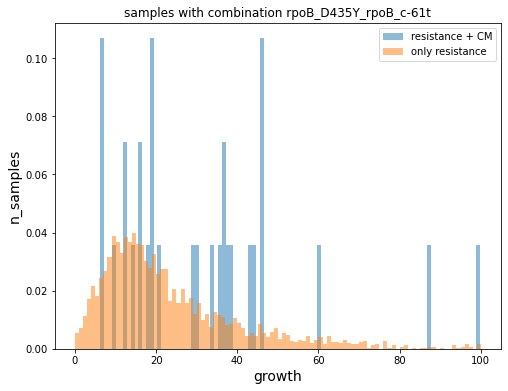

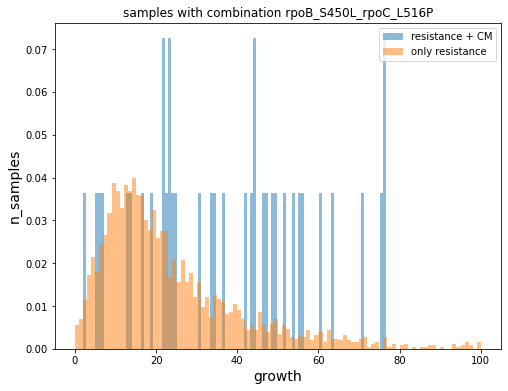

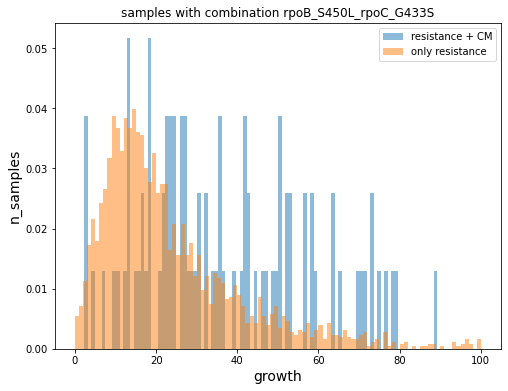

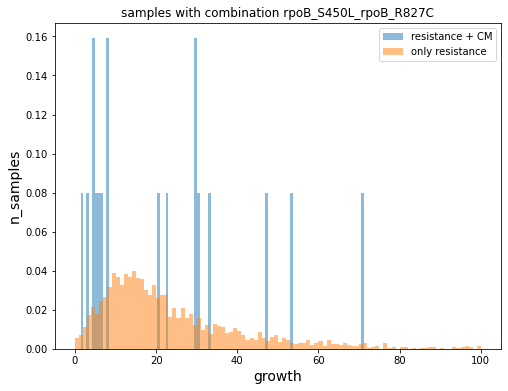

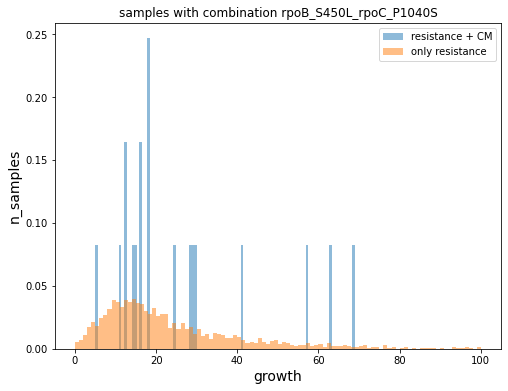

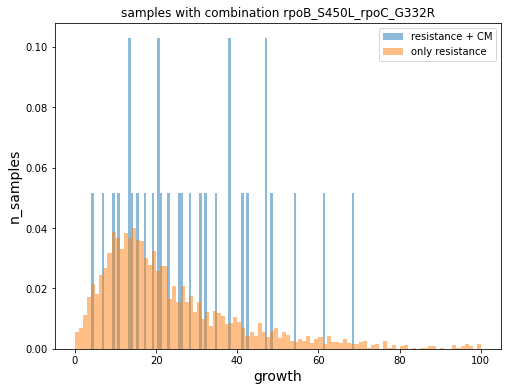

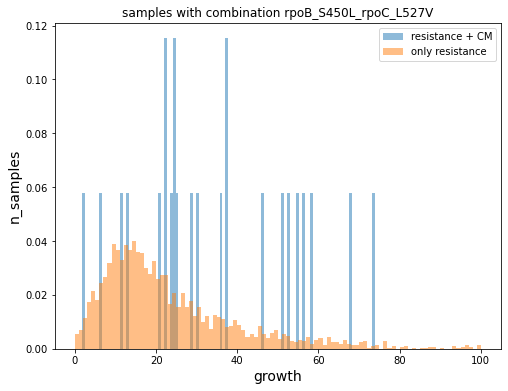

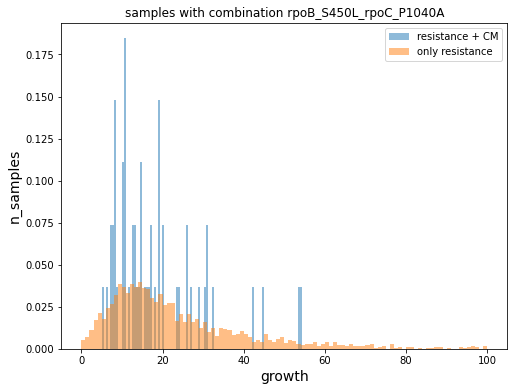

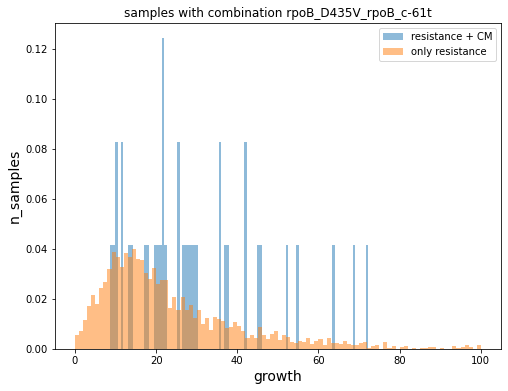

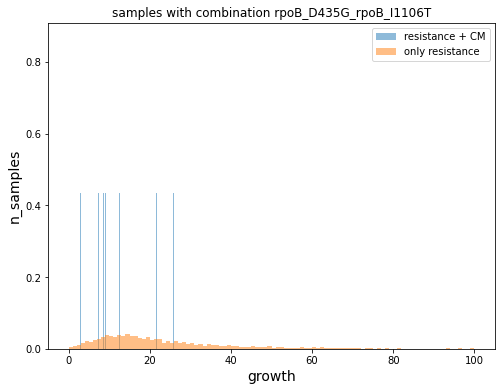

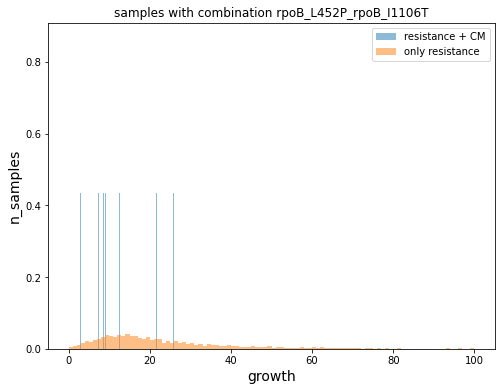

In [69]:
for i, combination in enumerate(combinations):
    to_plot = hit_samples.loc[combination]
    
    data1 = PLATES[(PLATES.UNIQUEID.isin(to_plot.UNIQUEID.values.tolist()))].IM_POS_AVERAGE
    data2 = PLATES[(PLATES.UNIQUEID.isin(EFFECTS.UNIQUEID.values.tolist()))&(~(PLATES.UNIQUEID.isin(concat_samples.UNIQUEID.values.tolist())))].IM_POS_AVERAGE
    
    
    plt.figure(figsize=(8,6))
    plt.hist(data1, bins=100, alpha=0.5, label="resistance + CM", density=True)
    plt.hist(data2, bins=100, alpha=0.5, label="only resistance", density=True)
    plt.xlabel("growth", size=14)
    plt.ylabel("n_samples", size=14)
    plt.title("samples with combination " + combination)
    plt.legend(loc='upper right')
    #plt.savefig('/Users/viktoriabrunner/Documents/Studium/PhD/Project1_rev/repository/tb-rnap-compensation/figures/growth/'+combination)


Plot including pan-susceptible samples

Extract pan-susceptible samples from GENOMES table

In [70]:
GENOMES = pandas.read_pickle('tb_rnap_compensation/tables/GENOMES.pkl.gz')
GENOMES.WGS_PREDICTION_STRING

UNIQUEID
site.02.subj.0958.lab.22A197.iso.1                        RRURRRSSSSSSSSS
site.02.subj.0823.lab.2013241494.iso.1                    UUSUSSSSSSSSSSS
site.02.subj.0359.lab.222018-14.iso.1                     SUSSSSSSUSSSSSS
site.02.subj.0224.lab.2013221088.iso.1                    SSSSSSSSSSSSSSS
site.02.subj.0918.lab.22A153.iso.1                        RRRRSSUSUSSSSSS
                                                               ...       
site.10.subj.YA00023171.lab.YA00023171.iso.1              SSSSSSUSSSSSSSS
site.10.subj.SADH00634109_S16.lab.DH00634109_S16.iso.1    SSSSSSSSSSSSSSS
site.10.subj.H37RV_SA2437.lab.H37RV_SA2437.iso.1          SSSSSSSSSSSSSSS
site.10.subj.YA00044774.lab.YA00044774.iso.1              SSSSSSUSSSSSSSS
site.10.subj.YA00166043.lab.YA00166043.iso.1              RRURRRRRUSSSSSS
Name: WGS_PREDICTION_STRING, Length: 77860, dtype: object

In [71]:
pan_sus = GENOMES[(GENOMES.WGS_PREDICTION_STRING.str[0:4].isin(['SSSS']))].index
pan_sus

Index(['site.02.subj.0224.lab.2013221088.iso.1',
       'site.02.subj.0271.lab.2014232014.iso.1',
       'site.02.subj.0085.lab.22A036.iso.1',
       'site.02.subj.0045.lab.2015231012.iso.1',
       'site.02.subj.0691.lab.2014241055.iso.1',
       'site.02.subj.0370.lab.222044-14.iso.1',
       'site.02.subj.0418.lab.234037-14.iso.1',
       'site.02.subj.1128.lab.2014185052.iso.1',
       'site.02.subj.0465.lab.233009-14.iso.1',
       'site.02.subj.0330.lab.2015235158.iso.1',
       ...
       'site.10.subj.SAEI00666603_S8.lab.EI00666603_S8.iso.1',
       'site.10.subj.SAEI00657490_S10.lab.EI00657490_S10.iso.1',
       'site.10.subj.SABE01453006_S31.lab.BE01453006_S31.iso.1',
       'site.10.subj.SABR00093905_S11.lab.BR00093905_S11.iso.1',
       'site.10.subj.SACE01671817_S27.lab.CE01671817_S27.iso.1',
       'site.10.subj.YA00033558.lab.YA00033558.iso.1',
       'site.10.subj.YA00023171.lab.YA00023171.iso.1',
       'site.10.subj.SADH00634109_S16.lab.DH00634109_S16.iso.1',
       '

In [105]:
data1 = PLATES[(PLATES.UNIQUEID.isin(concat_samples.UNIQUEID.values.tolist()))].IM_POS_AVERAGE
data2 = PLATES[(PLATES.UNIQUEID.isin(EFFECTS.UNIQUEID.values.tolist()))&(~(PLATES.UNIQUEID.isin(concat_samples.UNIQUEID.values.tolist())))].IM_POS_AVERAGE
data3 = PLATES[(PLATES.UNIQUEID.isin(pan_sus.values.tolist()))].IM_POS_AVERAGE

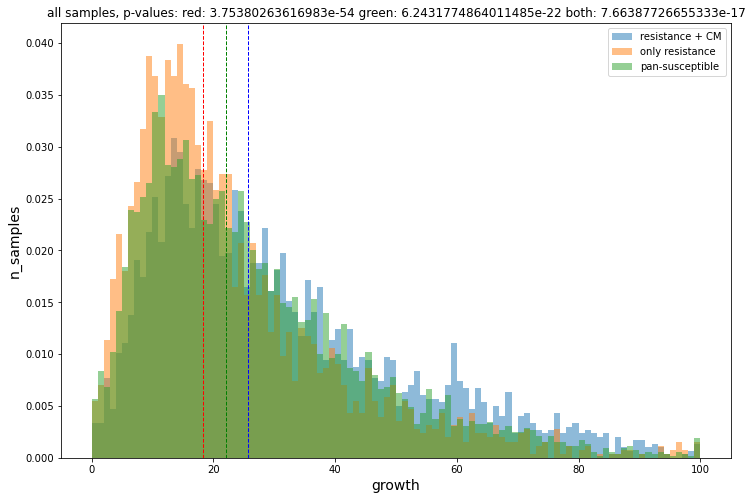

In [107]:
plt.figure(figsize=(12,8))

plt.hist(data1, bins=100, alpha=0.5, label="resistance + CM", density=True)
plt.axvline(data1.median(), color='blue', linestyle='dashed', linewidth=1)
plt.hist(data2, bins=100, alpha=0.5, label="only resistance", density=True)
plt.axvline(data2.median(), color='red', linestyle='dashed', linewidth=1)
plt.hist(data3, bins=100, alpha=0.5, label="pan-susceptible", density=True)
plt.axvline(data3.median(), color='green', linestyle='dashed', linewidth=1)

data1.dropna(inplace=True)
data2.dropna(inplace=True)
data3.dropna(inplace=True)
stat, p1 = mannwhitneyu(data2, data1)
stat, p2 = mannwhitneyu(data3, data1)
stat, p3 = mannwhitneyu(data3, data2)

plt.xlabel("growth", size=14)
plt.ylabel("n_samples", size=14)
plt.title("all samples, p-values: red: " + str(p1) + " green: " + str(p2) + " both: " + str(p3))
plt.legend(loc='upper right')
plt.show()

/var/folders/qq/hh4z_qvd2l183wg_57cf1pyc0000gn/T/ipykernel_29365/3895621002.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,8))


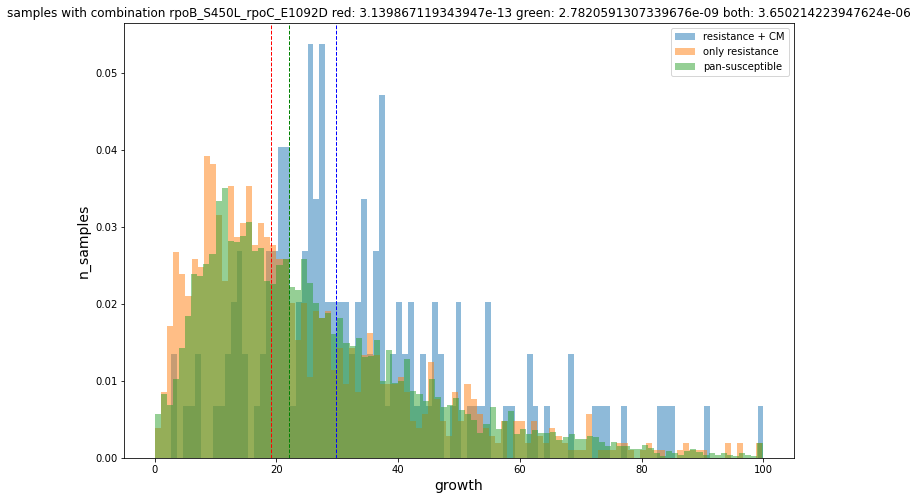

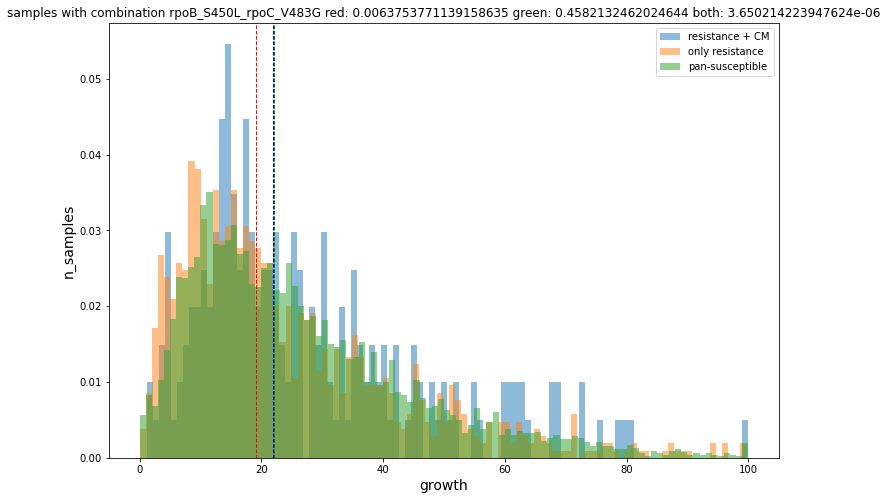

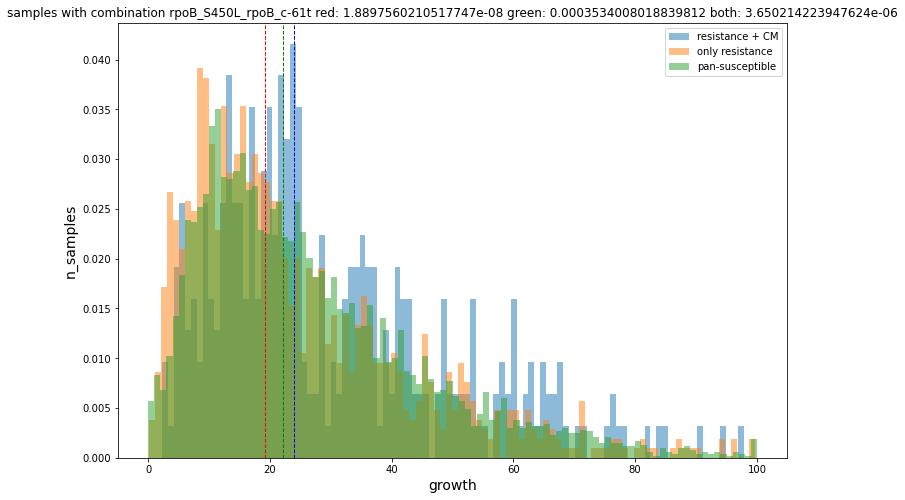

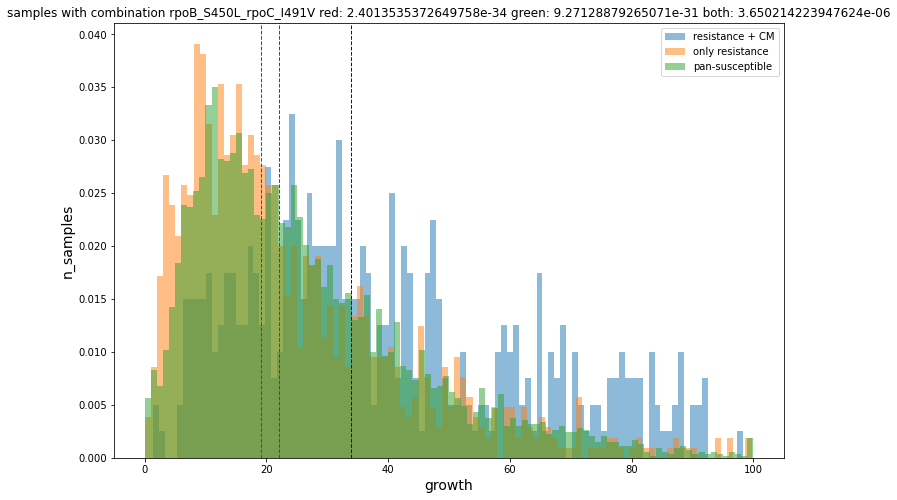

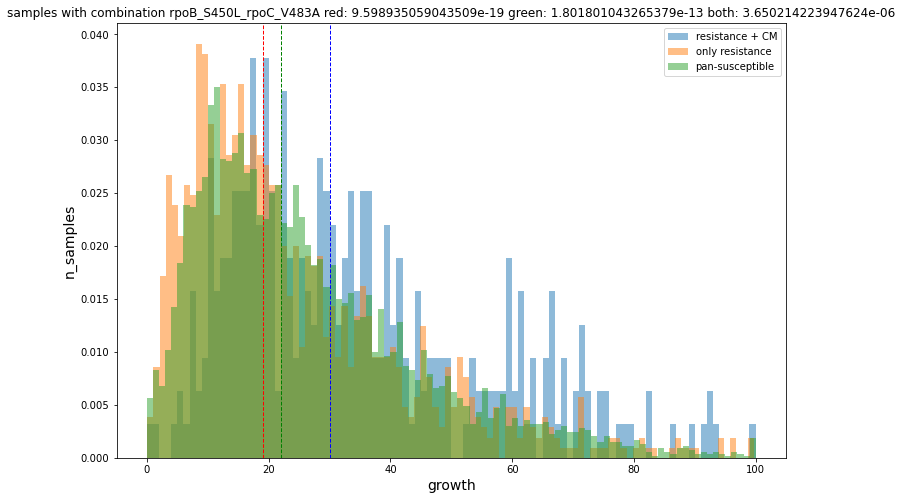

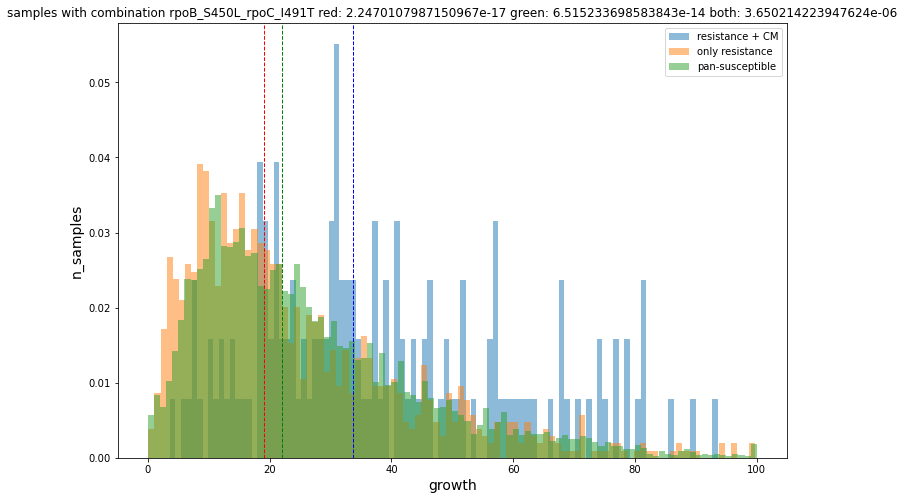

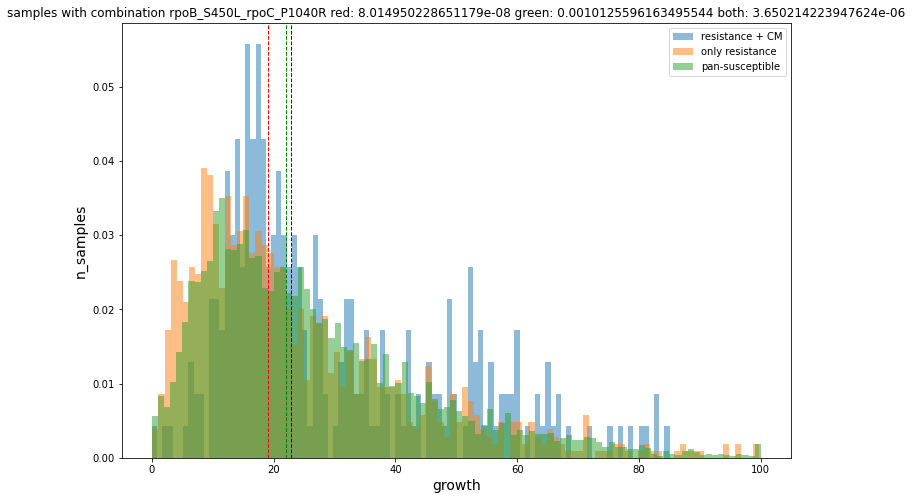

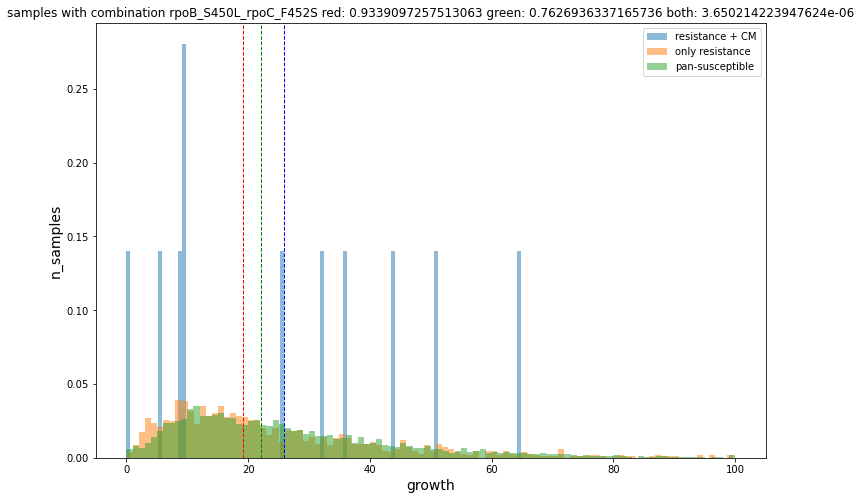

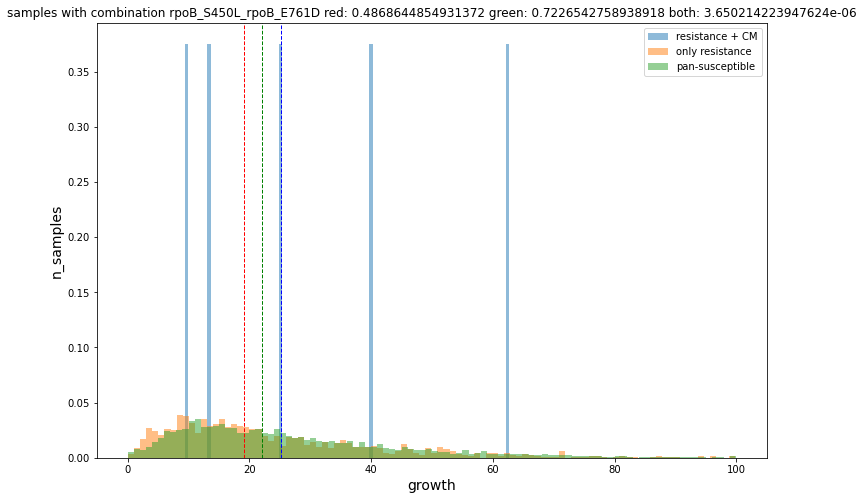

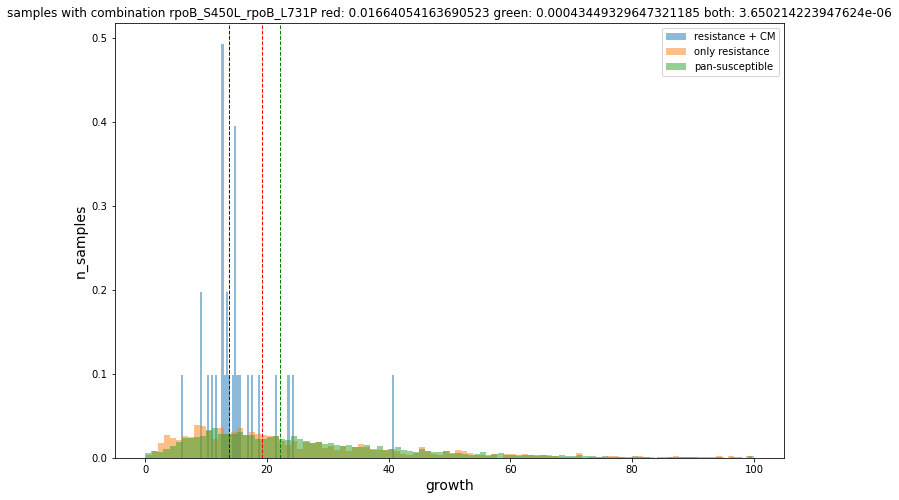

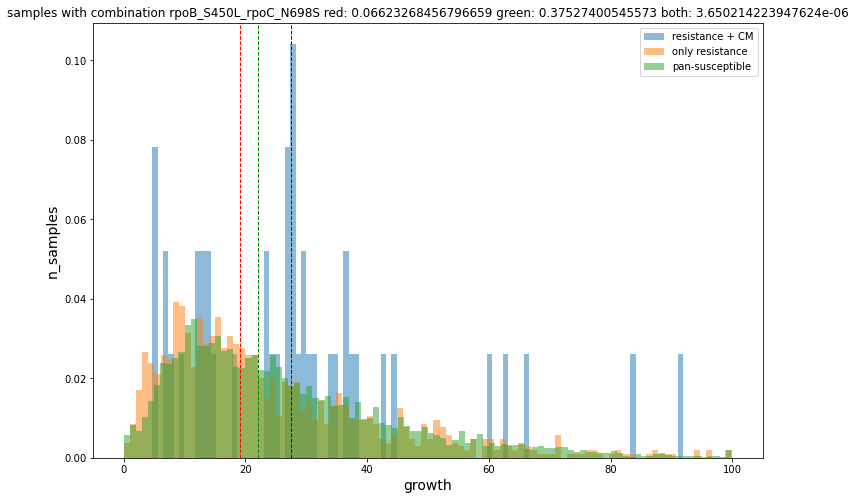

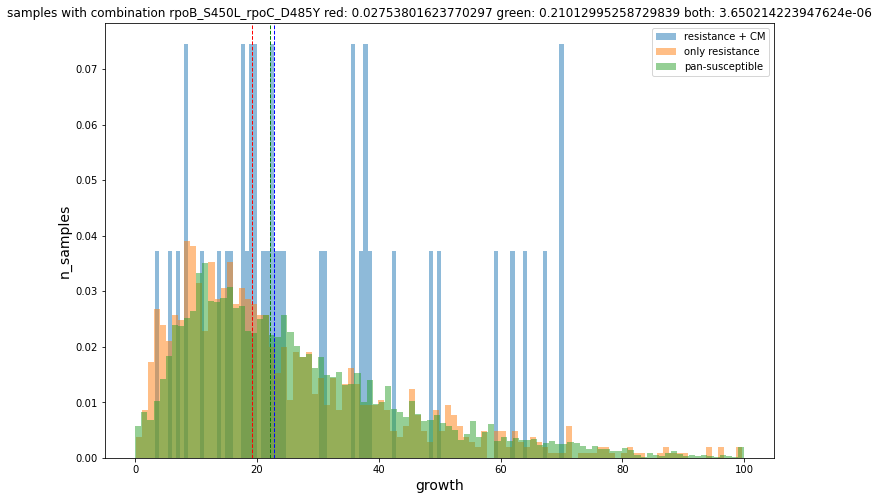

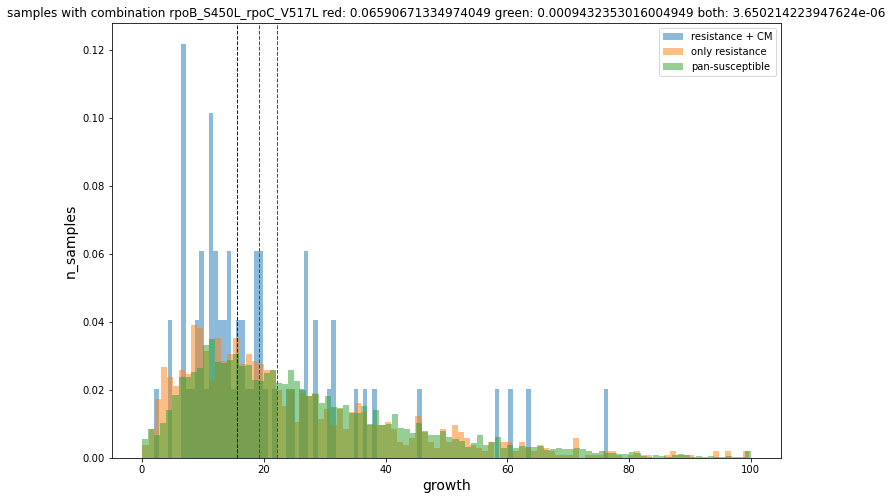

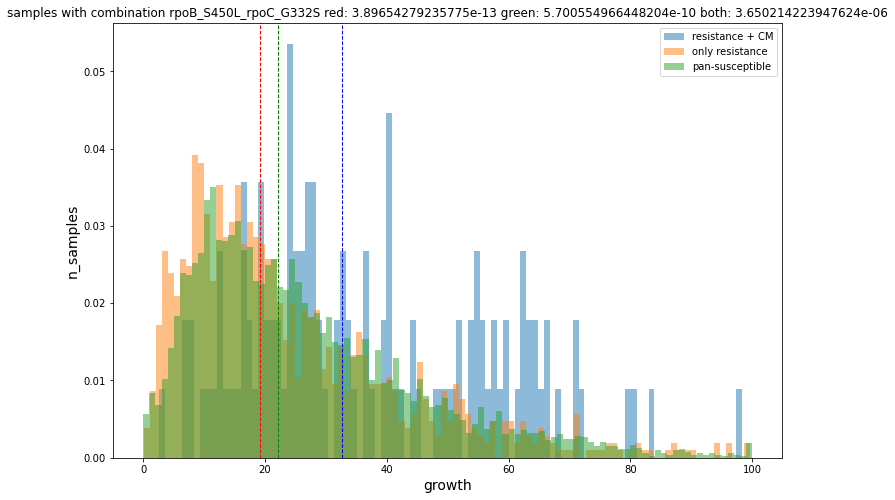

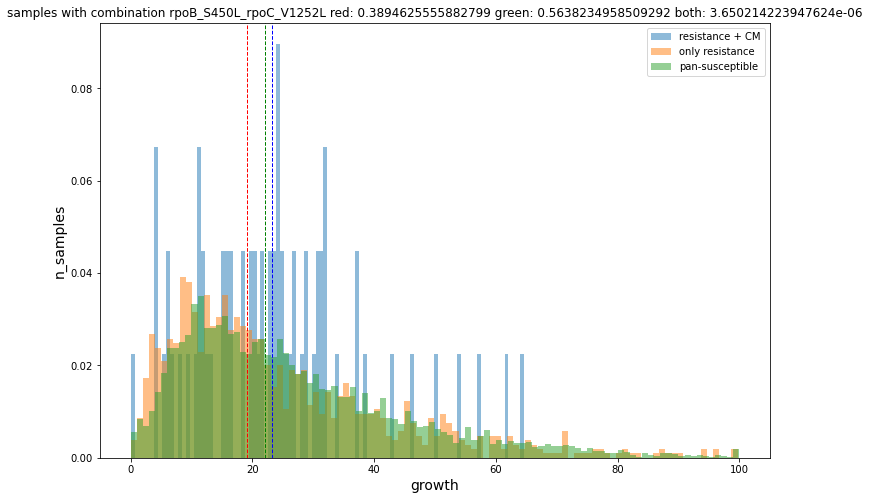

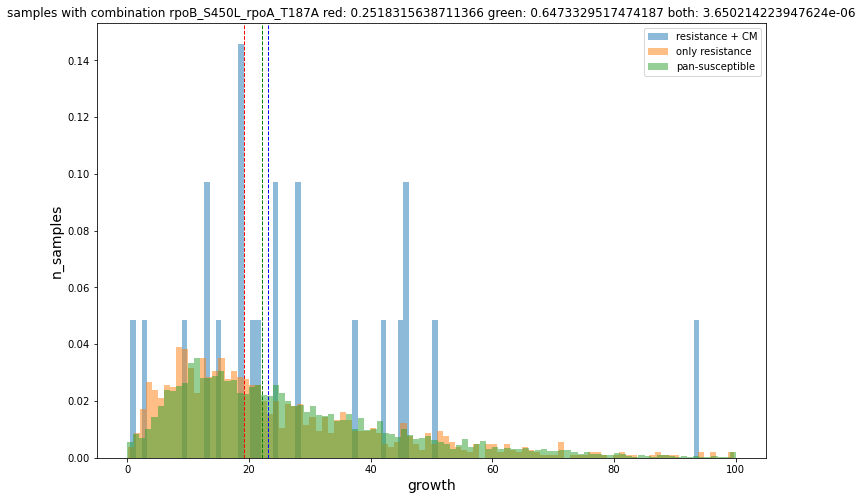

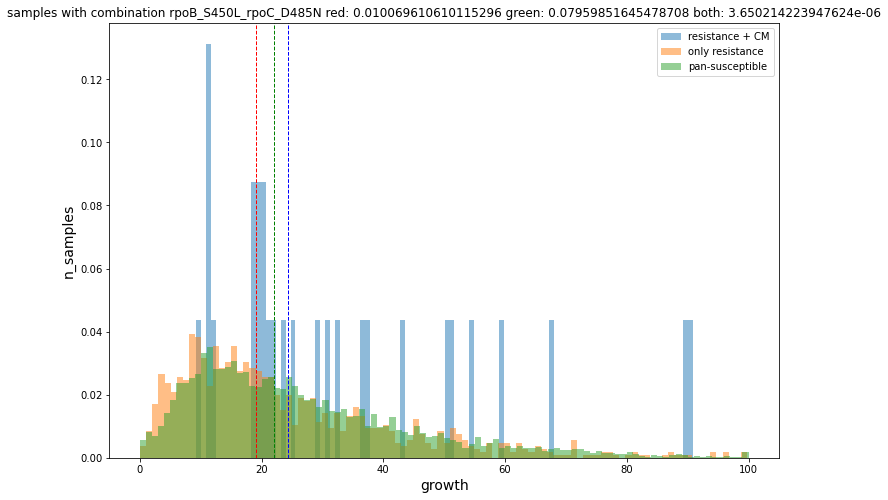

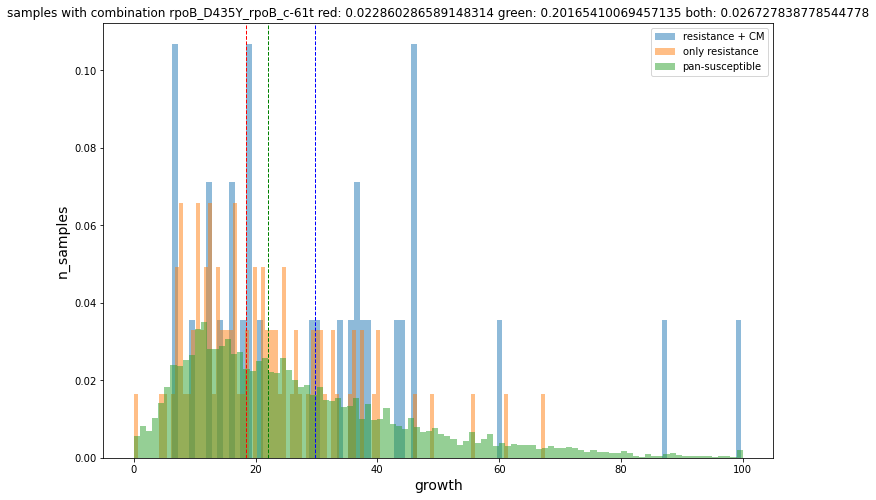

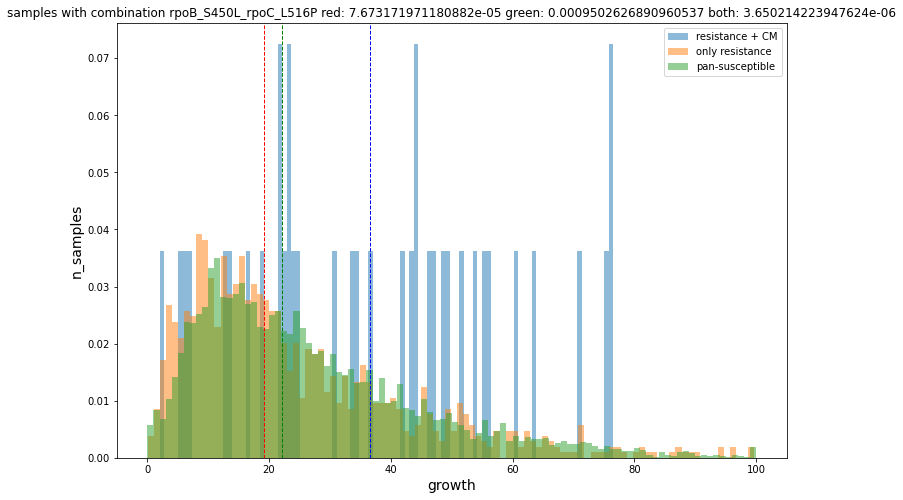

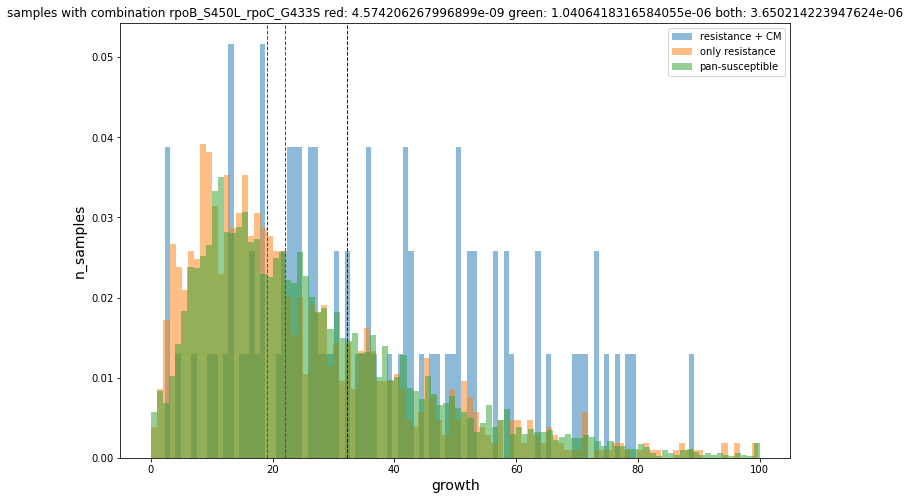

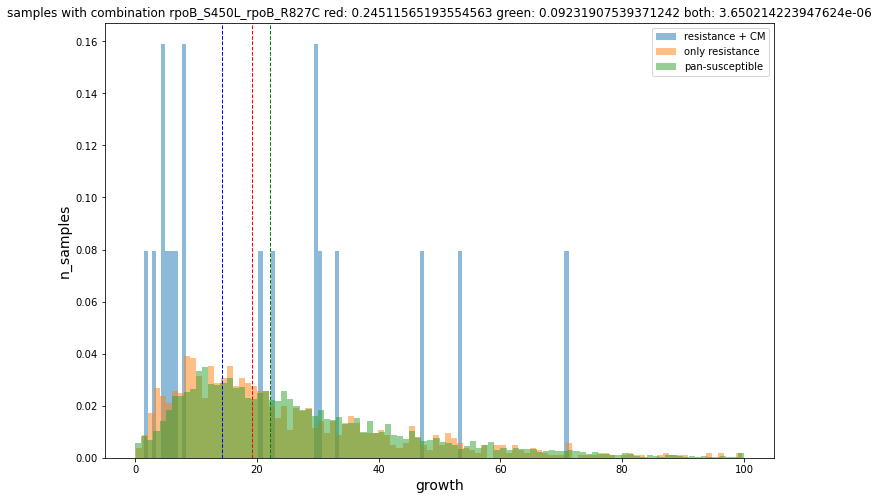

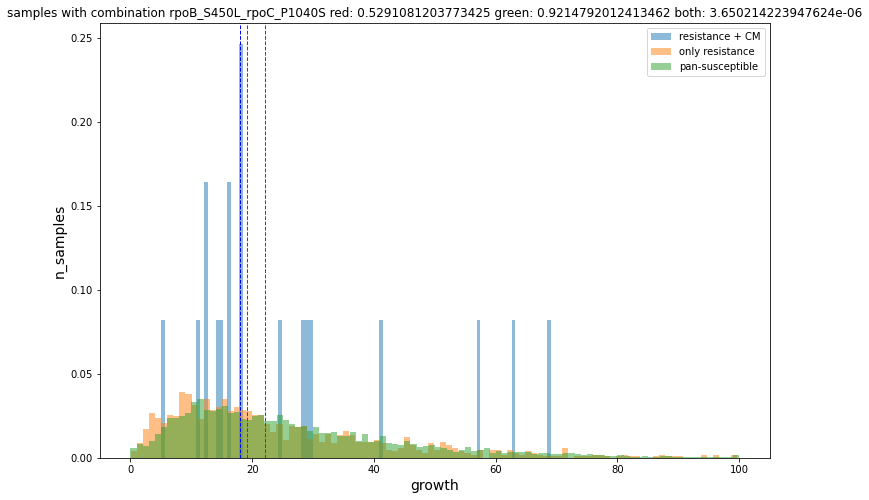

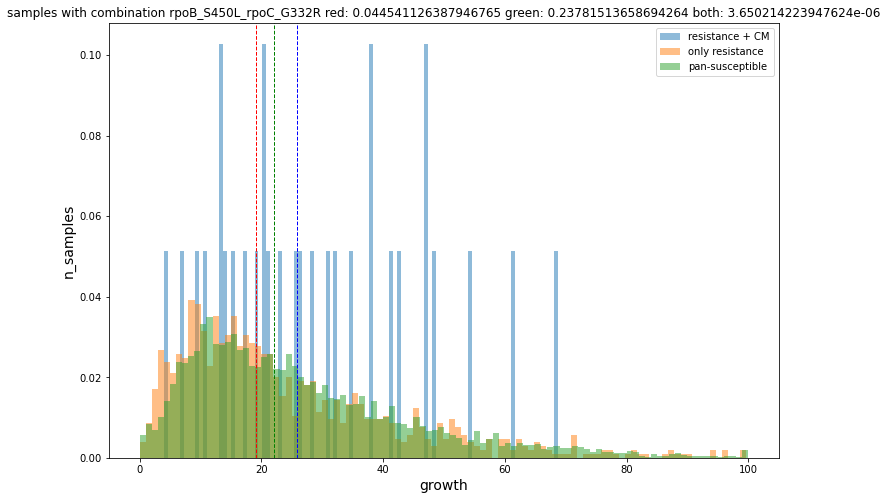

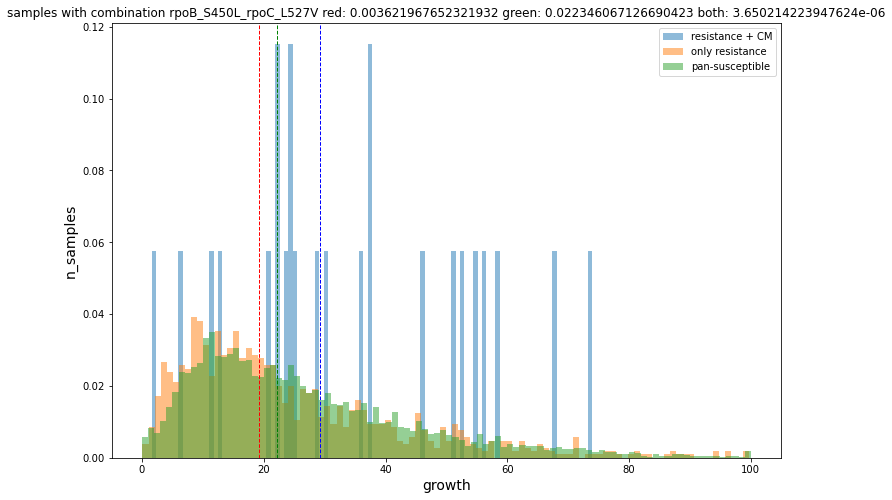

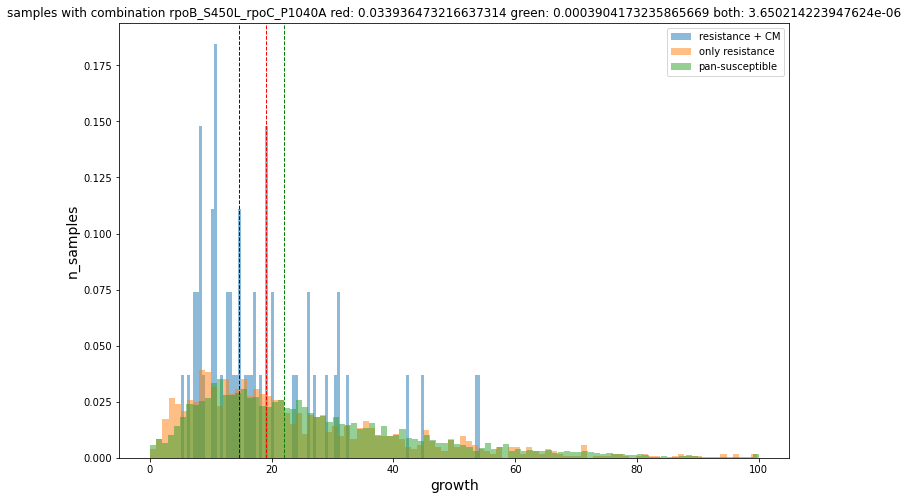

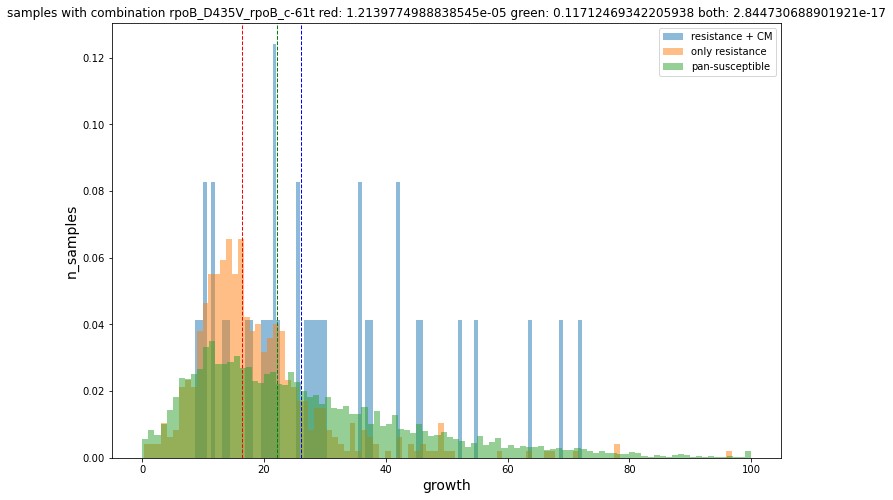

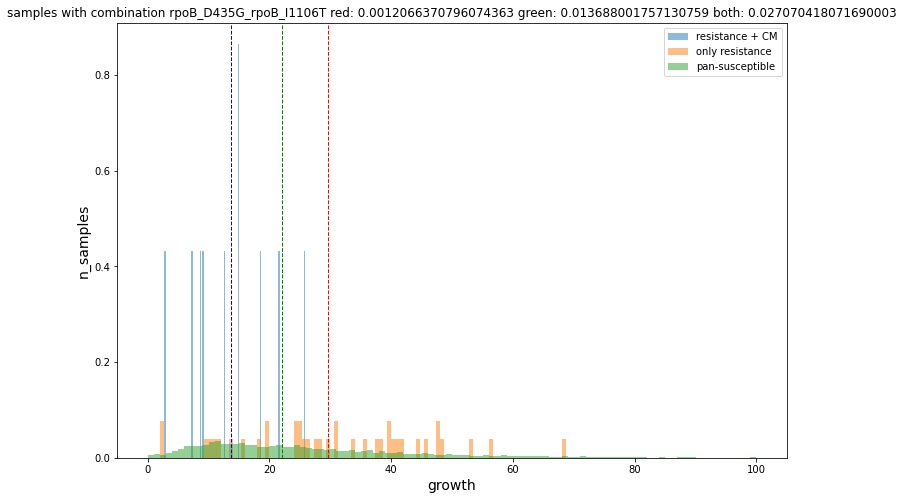

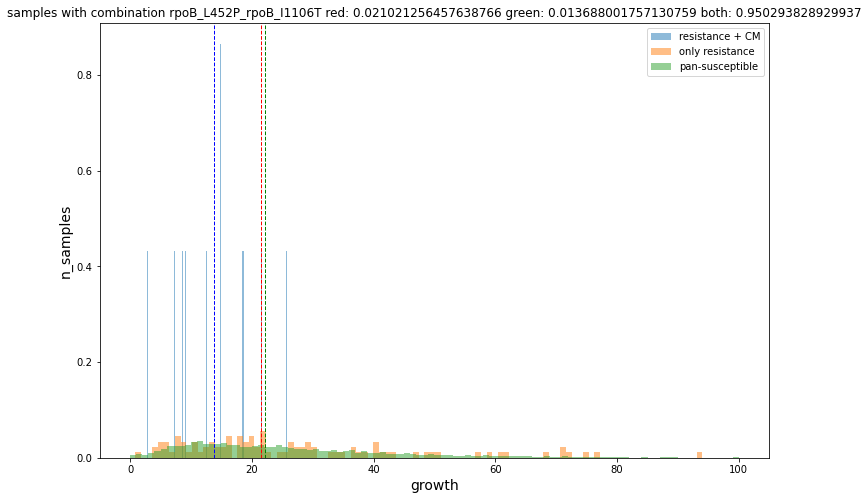

In [109]:
#data2 = PLATES[(PLATES.UNIQUEID.isin(EFFECTS.UNIQUEID.values.tolist()))&(~(PLATES.UNIQUEID.isin(concat_samples.UNIQUEID.values.tolist())))].IM_POS_AVERAGE
data3 = PLATES[(PLATES.UNIQUEID.isin(pan_sus.values.tolist()))].IM_POS_AVERAGE
data3.dropna(inplace=True)


for i, combination in enumerate(combinations):
    to_plot = hit_samples.loc[combination]
    
    #only include resistant samples with specific resistance mutation in combination
    data2 = PLATES[(PLATES.UNIQUEID.isin(EFFECTS[EFFECTS.MUTATION==combination[5:10]].UNIQUEID.values.tolist()))&(~(PLATES.UNIQUEID.isin(concat_samples.UNIQUEID.values.tolist())))].IM_POS_AVERAGE
    data2.dropna(inplace=True)
    
    data1 = PLATES[(PLATES.UNIQUEID.isin(to_plot.UNIQUEID.values.tolist()))].IM_POS_AVERAGE
    data1.dropna(inplace=True)
    stat, p1 = mannwhitneyu(data2, data1)
    stat, p2 = mannwhitneyu(data3, data1)
    stat, p3 = mannwhitneyu(data2, data3)
    
    plt.figure(figsize=(12,8))
    
    plt.hist(data1, bins=100, alpha=0.5, label="resistance + CM", density=True)
    plt.axvline(data1.median(), color='blue', linestyle='dashed', linewidth=1)
    plt.hist(data2, bins=100, alpha=0.5, label="only resistance", density=True)
    plt.axvline(data2.median(), color='red', linestyle='dashed', linewidth=1)
    plt.hist(data3, bins=100, alpha=0.5, label="pan-susceptible", density=True)
    plt.axvline(data3.median(), color='green', linestyle='dashed', linewidth=1)
    
    plt.xlabel("growth", size=14)
    plt.ylabel("n_samples", size=14)
    plt.title("samples with combination " + combination + " red: " + str(p1) + " green: " + str(p2) + " both: " + str(p3))
    plt.legend(loc='upper right')
    #plt.savefig('/Users/viktoriabrunner/Documents/Studium/PhD/Project1_rev/repository/tb-rnap-compensation/figures/growth_sus/'+combination)


In [144]:
rows = []
for res in hits.resistant_mutation.unique():
    #print(res)
    res_samples = MUTATIONS[MUTATIONS.GENE_MUTATION==res].UNIQUEID
    for other in hits.other_mutation.unique():
        #print(other)
        prevalence = len(MUTATIONS[(MUTATIONS.GENE_MUTATION==other) & (MUTATIONS.UNIQUEID.isin(res_samples))].UNIQUEID)
        #print(prevalence)
        if prevalence > 50:
            rows.append([res, other, prevalence])
hits_filtered = pandas.DataFrame(rows, columns = ['resistant_mutation', 'other_mutation', 'prevalence'])     
hits_filtered

writer = pandas.ExcelWriter('hits_filtered.xlsx', engine='xlsxwriter')
hits_filtered.to_excel(writer, index=False)
writer.save()  